In [11]:
import os
from googleapiclient.discovery import build
from google.oauth2.service_account import Credentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
SERVICE_ACCOUNT_FILE ='marine-guard-442216-f5-35b478f539ff.json'
SCOPES = os.getenv('GOOGLE_SCOPES', 'https://www.googleapis.com/auth/spreadsheets.readonly').split(',')

credentials = Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES)

In [ ]:
SPREADSHEET_ID = os.getenv('SPREADSHEET_ID') # SPREADSHEET_ID=1pGHTCCKlJoapYVqahkLUD3E0f2jo-vQXFRH-N4f6OIY
RANGE_NAME = os.getenv('RANGE_NAME') # RANGE_NAME=SQL DDL Quiz Questions!J:O
service = build('sheets', 'v4', credentials=credentials)
sheet = service.spreadsheets()

In [14]:
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()
rows = result.get('values', [])

In [22]:
rows

[['Post Date',
  'Posting Status',
  'Platform',
  'Impressions',
  'Vote',
  'Engagement rate'],
 ['01-Nov-2024', 'Posted', 'Linkedin, Youtube', '657', '58', '8.83%'],
 ['02-Nov-2024', 'Posted', 'Linkedin, Youtube', '366', '17', '5.48%'],
 ['03-Nov-2024', 'Posted', 'Linkedin, Youtube', '922', '50', '5.42%'],
 ['04-Nov-2024', 'Posted', 'Linkedin, Youtube', '895', '54', '6.03%'],
 [],
 ['05-Nov-2024', 'Posted', 'Linkedin, Youtube', '795', '48', '6.09%'],
 ['06-Nov-2024', 'Posted', 'Linkedin, Youtube', '417', '25', '6.00%'],
 ['07-Nov-2024', 'Posted', 'Linkedin, Youtube', '582', '35', '6.01%'],
 ['08-Nov-2024', 'Posted', 'Linkedin, Youtube', '736', '39', '5.30%'],
 ['09-Nov-2024', 'Posted', 'Linkedin, Youtube', '465', '28', '6.02%'],
 ['10-Nov-2024', 'Posted', 'Linkedin, Youtube', '638', '38', '5.96%'],
 ['11-Nov-2024', 'Posted', 'Linkedin, Youtube', '496', '25', '5.04%'],
 ['12-Nov-2024', 'Posted', 'Linkedin, Youtube', '757', '59', '7.79%'],
 ['13-Nov-2024', 'Posted', 'Linkedin, Youtube

In [15]:
if rows:
    headers = rows[0]
    data = pd.DataFrame(rows[1:], columns=headers)
    data['Post Date'] = pd.to_datetime(data['Post Date'], format='%d-%b-%Y')
    data['Impressions'] = pd.to_numeric(data['Impressions'])
    data['Vote'] = pd.to_numeric(data['Vote'])

In [23]:
data

,Post Date,Posting Status,Platform,Impressions,Vote,Engagement rate
0,2024-11-01,Posted,"Linkedin, Youtube",657.0,58.0,8.83%
1,2024-11-02,Posted,"Linkedin, Youtube",366.0,17.0,5.48%
2,2024-11-03,Posted,"Linkedin, Youtube",922.0,50.0,5.42%
3,2024-11-04,Posted,"Linkedin, Youtube",895.0,54.0,6.03%
4,NaT,None,None,NaN,NaN,None
5,2024-11-05,Posted,"Linkedin, Youtube",795.0,48.0,6.09%
6,2024-11-06,Posted,"Linkedin, Youtube",417.0,25.0,6.00%
7,2024-11-07,Posted,"Linkedin, Youtube",582.0,35.0,6.01%
8,2024-11-08,Posted,"Linkedin, Youtube",736.0,39.0,5.30%
9,2024-11-09,Posted,"Linkedin, Youtube",465.0,28.0,6.02%


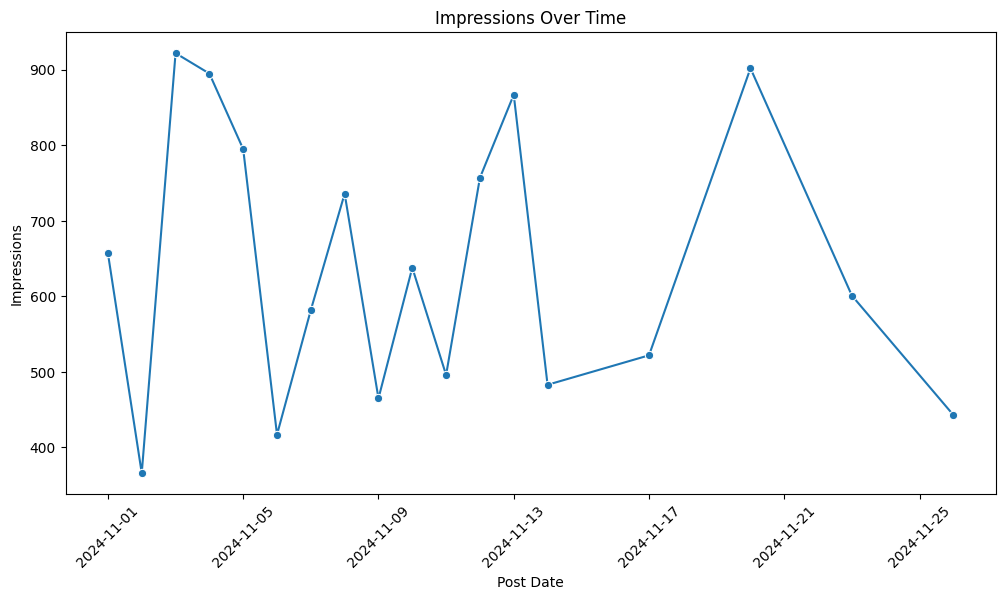

In [25]:
#  Impressions vs Post Date Graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Post Date", y="Impressions", marker='o')
plt.title("Impressions Over Time")
plt.xlabel("Post Date")
plt.ylabel("Impressions")
plt.xticks(rotation=45)
plt.show()

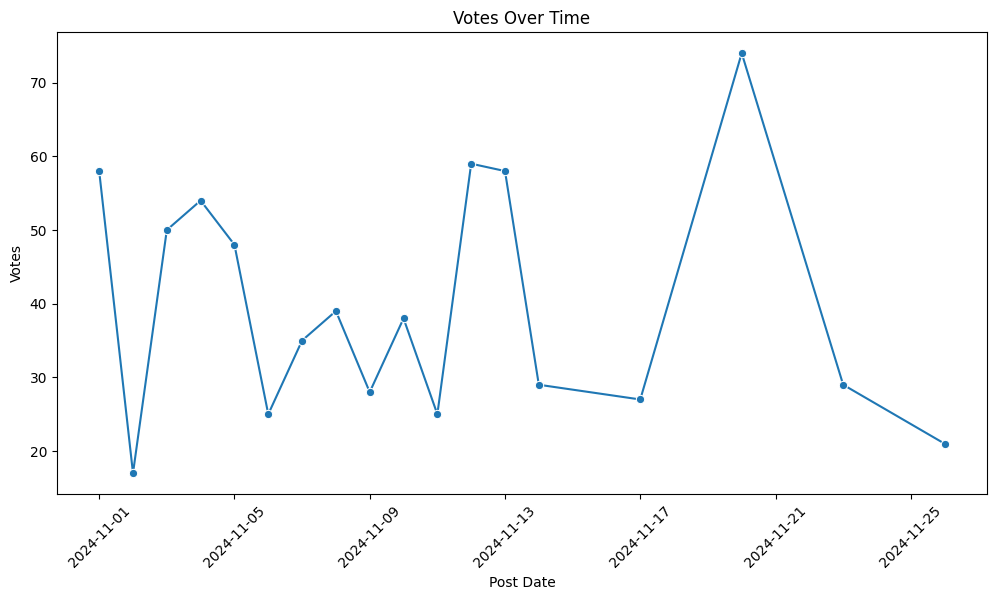

In [27]:
# Vote vs Post Date Graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Post Date", y="Vote", marker='o')
plt.title("Votes Over Time")
plt.xlabel("Post Date")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()